IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [2]:
global H_0, m_0, c
m_0 = -20.45
c = 299792458 # m/s
H_0 = 70*10**-3 #m s^-1 pc^-1

READ DATA

In [3]:
#reads data and saves it into relevantly named variables.
data = functions.read_data('sn_data_extended.txt')
name, redshift, distance_modulus, dm_err = data[0], data[1], data[2], data[3]

Calculate Density Parameters with no restriction on Universe geometry - automated chi-squared fitting

DoF = 578
Optimised parameters =  [0.72335839 0.2785277 ] 

Covariance matrix = 
 [[0.00670455 0.0047846 ]
 [0.0047846  0.00393854]]


c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,
c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:110: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,


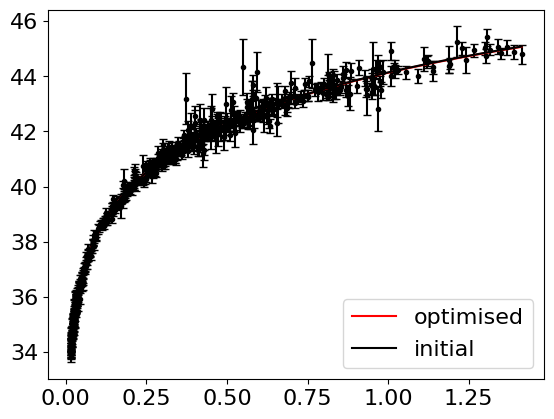

chi^2_min = 562.2265014400585
reduced chi^2 = 0.9727102101039075
$P(chi^2_min, DoF)$ = 0.6731256805812623


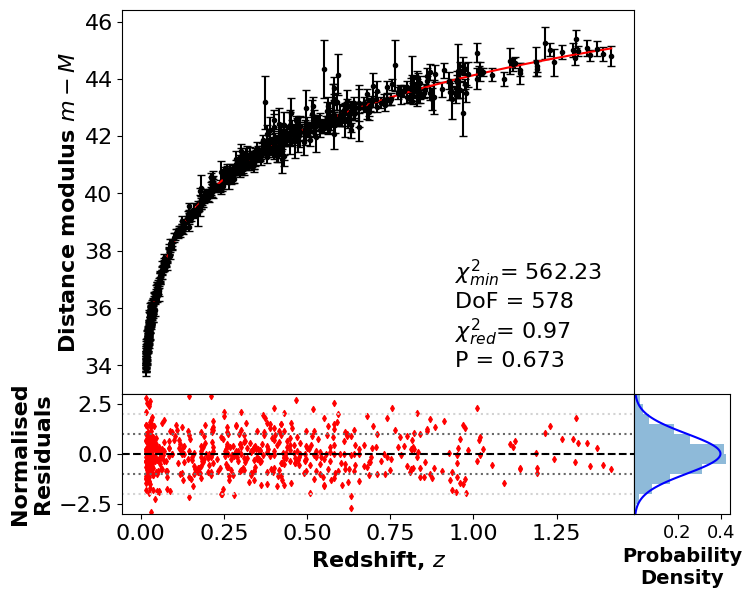

optimised parameter[0] = 0.723358386409343 +/- 0.08188132421468118
optimised parameter[1] = 0.2785277011283405 +/- 0.06275779656676277
omega_TOT = 1.0018860875376836 +/- 0.10316536378584101


In [4]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

3 parameter fitting

In [5]:
#chi squared fitting

"""xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3, 0.075]), np.array([0.05, 0.075]), np.array([1.5, 0.51, 0.075])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1 or k==-1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0][0:2]), np.sqrt(np.sum(parameters[1][0:2]**2))))"""

"xval = redshift\nyval = distance_modulus\nyerr = dm_err\n\nplt.rcParams.update({'font.size': 16, 'lines.markersize': 3})\n\ndef model_funct(xs, *vals):\n    try:\n        if k==0:\n            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]\n        else:\n            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]\n    except:\n        if k==0:\n            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])\n        else:\n            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])\n\n    if k == 0:\n        return 5*np.log10((1+xs)*r_c)-5\n    elif k == 1:\n        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5\n        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c

Different dataset

0.5043


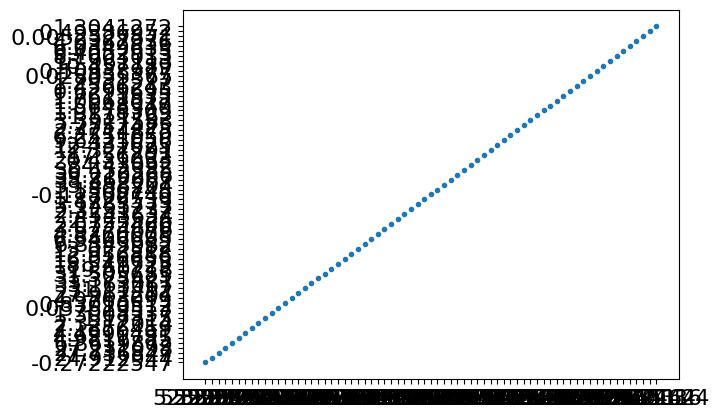

In [6]:
#ascii python reader for table
alldata = np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 26)
redshifts = float(np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 3, max_rows=1)[1])
time = alldata[:, 0]
flux = alldata[:, 1]
plt.scatter(time, flux)
print(redshifts)

*_Markov-Chain Monte-Carlo_* - Random Walker

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'xval')

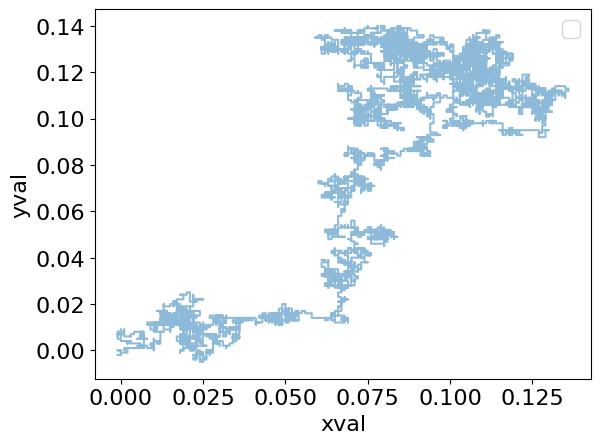

In [7]:
class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=np.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(np.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = np.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=np.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(0,n):
            positions[i+1] = positions[i]+self.pickStep()
        return positions
    
initial_pos = [0]
w = walker(initial_pos, ndim = 2, step_size=0.001)
pos_test = w.doSteps(10000)
# plots to help debugging
plt.plot(pos_test[:, 0], pos_test[:, 1], alpha = 0.5)
plt.legend()
plt.ylabel('yval')
plt.xlabel('xval')